In [6]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, value

In [22]:
#Load wind data
df = pd.read_csv('hypothetical_wind_turbine_data.csv')

In [10]:
#Define Wind Speed Profile from the CSV file
wind_speed_profile = df['Wind Speed (m/s)']

In [24]:
#Add Wind Turbine Parameters and Maintenance hours
#Wind Turbine Parameters
cut_in_speed = 3.5 #Minimum Operational Windspeed in m/s
rated_speed = 15 #Optimal Operational Windspeed in m/s
cut_out_speed = 25 #Maximum operational Windspeed in m/s
maximum_power_output = 1500 # Maximum power output in kWh

#Maintenance hours
maintenance_hours = [20, 21, 22, 23]

In [32]:
lp_problem = LpProblem('Maximize_Energy_Output', LpMaximize)

In [44]:
#Creating a decision Variable
lp_variable = LpVariable.dicts('PowerOutput',
                               range(24),
                               lowBound = 0,
                               upBound = maximum_power_output,
                               cat = 'Continous')


In [46]:
#Defining the objective function
lp_problem += lpSum([power_output[hour] for hour in range (24)])

In [56]:
#Adding constraints for windspeed and maintenance hours
#Loop through each hour to set constraints
for hour in range(24):
    wind_speed = wind_speed_profile[hour]
    lp_problem += power_output[hour] <= (wind_speed >= cut_in_speed) * (wind_speed <= cut_out_speed) * maximum_power_output

    if hour in maintenance_hours:
        lp_problem += power_output[hour] == 0
    lp_problem += power_output[hour] <= maximum_power_output
            


In [58]:
# Solve the problem
lp_problem.solve()

1

In [60]:
#Extracting the Optimal Schedule and Power Output
optimal_output = [value(power_output[hour]) for hour in range (24)]

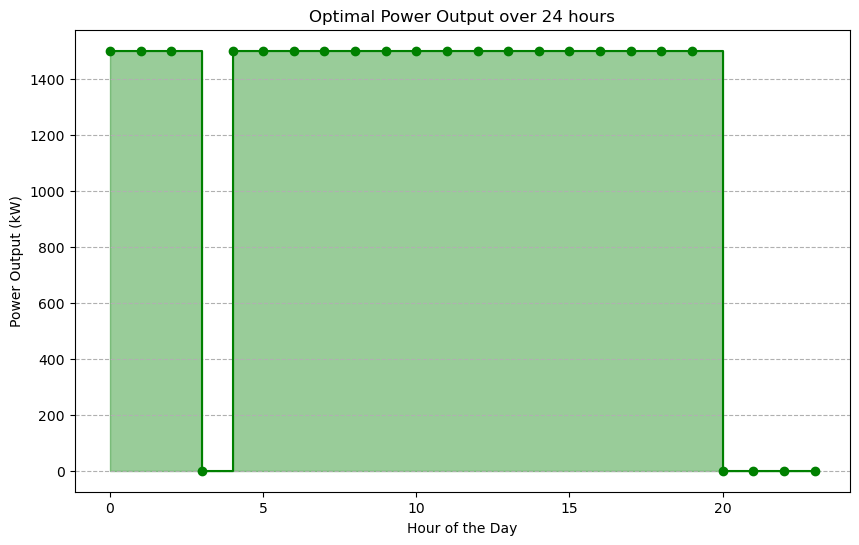

Status: 1
Power Output Hour 0: 1500.0
Power Output Hour 1: 1500.0
Power Output Hour 2: 1500.0
Power Output Hour 3: 0.0
Power Output Hour 4: 1500.0
Power Output Hour 5: 1500.0
Power Output Hour 6: 1500.0
Power Output Hour 7: 1500.0
Power Output Hour 8: 1500.0
Power Output Hour 9: 1500.0
Power Output Hour 10: 1500.0
Power Output Hour 11: 1500.0
Power Output Hour 12: 1500.0
Power Output Hour 13: 1500.0
Power Output Hour 14: 1500.0
Power Output Hour 15: 1500.0
Power Output Hour 16: 1500.0
Power Output Hour 17: 1500.0
Power Output Hour 18: 1500.0
Power Output Hour 19: 1500.0
Power Output Hour 20: 0.0
Power Output Hour 21: 0.0
Power Output Hour 22: 0.0
Power Output Hour 23: 0.0
Total Energy Output: 28500.0


In [66]:
# Calculate the total optimized power output
total_optimized_output = sum(optimal_output)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(24), optimal_output, drawstyle='steps-post', marker='o', color='green')
plt.fill_between(range(24), optimal_output, step='post', alpha=0.4, color='green')
plt.title('Optimal Power Output over 24 hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Power Output (kW)')
plt.grid(axis='y', linestyle='--')
plt.show()

# Print the results
print("Status:", lp_problem.status)
for hour in range(24):
    print(f"Power Output Hour {hour}: {value(power_output[hour])}")
print("Total Energy Output:", value(lp_problem.objective))